# Common problems faced by neural networks

When working with neural networks, you can face some problems. Sometimes, your model may be really good when predicting your training datasets, but performing poorly when seeing completely different data. Maybe, it just won't perform well at all, will have consistently huge losses or make bad predictions. 

Sometimes you do not have enough data to train your model, or your data is too disperse, the values are too different from each other, the training process is taking too long, the list goes on.

We will explore some of these problems, and apply some techniques to fix, and prevent them from happening.

## Underfitting

When your neural network is not performing well in it's own training set, and even worse in data that it has never seen before, is a phenom called underfitting. There are a lot of techniques that we can use to solve underfitting, and usually we have to analyze what is wrong with our model or data, and apply the correct technique to fix it.

Let's take a look at a neural network that is suffering from underfitting:

In [1]:
# Import the necesary packages
import numpy as np
import keras
from matplotlib import pyplot as plt
 
from keras.layers import Dense, Input, Dropout
from keras.models import Model, load_model
from keras.optimizers import Adam
from keras.datasets import boston_housing

Using TensorFlow backend.


In [2]:
# We will use the boston housing dataset in this example. Let's separate the data into training and test datases.
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [3]:
# Let's build a very simple network, with just one hidden layer with only two neurons inside it
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(2, activation='relu', name='fc1')(inputs)
  outputs = Dense(1, activation='linear', name='fc3')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 2)                 28        
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 3         
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________
None


In [4]:
# And let's train it using only 50 epochs:
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=50,
        batch_size=32)

Train on 404 samples, validate on 102 samples
Epoch 1/50
404/404 [==============================] - 0s 528us/step - loss: 45746.5008 - mae: 207.8456 - val_loss: 47486.1520 - val_mae: 211.2190
Epoch 2/50
404/404 [==============================] - 0s 51us/step - loss: 45274.5469 - mae: 206.7563 - val_loss: 46991.6695 - val_mae: 210.1108
Epoch 3/50
404/404 [==============================] - 0s 55us/step - loss: 44808.5840 - mae: 205.6753 - val_loss: 46501.3653 - val_mae: 209.0059
Epoch 4/50
404/404 [==============================] - 0s 55us/step - loss: 44340.6212 - mae: 204.5889 - val_loss: 46019.2494 - val_mae: 207.9136
Epoch 5/50
404/404 [==============================] - 0s 53us/step - loss: 43879.0714 - mae: 203.5141 - val_loss: 45539.9700 - val_mae: 206.8215
Epoch 6/50
404/404 [==============================] - 0s 51us/step - loss: 43421.9097 - mae: 202.4382 - val_loss: 45060.3045 - val_mae: 205.7221
Epoch 7/50
404/404 [==============================] - 0s 53us/step - loss: 42966.24

102/102 [==============================] - 0s 69us/step
Mean absolute error: 159.72500610351562
Mean squared error: 27313.47430300245


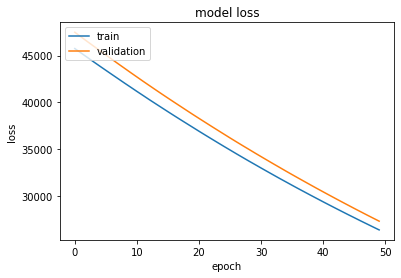

In [5]:
# Ok, now let's calculate the error of the network and plot it:
def plot_loss_and_error():
  test_mse_score, test_mae_score = net.evaluate(x_test, y_test)
  print("Mean absolute error:",test_mae_score)
  print("Mean squared error:",test_mse_score)

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'validation'], loc='upper left')
  plt.show()

plot_loss_and_error()

As we can see, our errors are enormous. Remember, when analyzing this kind of graphic, the lower the validation loss, the better our model is. And in this case, the error is really big. We must improve our network somehow, or else it will perform poorly when exposed to data it has never seen before.

In the network exposed above, we have two serious mistakes:

- The network is very simple. Just a layer with two neurons is not enough, we must add complexity. Some more layers with more neurons should do the trick;

- We are not training it for long enough. We are only making fifty training iterations, we need to train it for longer.

In [6]:
# Let's try again. What about a lot of layers and neurons?
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(512, activation='relu', name='fc1')(inputs)
  model = Dense(512, activation='relu', name='fc2')(model)
  model = Dense(512, activation='relu', name='fc3')(model)
  model = Dense(512, activation='relu', name='fc4')(model)
  model = Dense(512, activation='relu', name='fc5')(model)
  model = Dense(512, activation='relu', name='fc6')(model)
  model = Dense(512, activation='relu', name='fc7')(model)
    
  outputs = Dense(1, activation='linear', name='fc8')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               7168      
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc3 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc4 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc5 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc6 (Dense)                  (None, 512)               2626

In [7]:
# Let's add a lot of epochs. What can go wrong?
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=500,
        batch_size=32)

Train on 404 samples, validate on 102 samples
Epoch 1/500
404/404 [==============================] - 1s 2ms/step - loss: 231.8728 - mae: 11.9417 - val_loss: 129.8671 - val_mae: 9.1111
Epoch 2/500
404/404 [==============================] - 0s 1ms/step - loss: 84.4820 - mae: 6.8512 - val_loss: 74.2946 - val_mae: 6.1678
Epoch 3/500
404/404 [==============================] - 0s 1ms/step - loss: 68.8086 - mae: 5.8229 - val_loss: 62.7457 - val_mae: 5.9783
Epoch 4/500
404/404 [==============================] - 0s 1ms/step - loss: 62.9213 - mae: 5.4236 - val_loss: 63.0816 - val_mae: 5.9515
Epoch 5/500
404/404 [==============================] - 0s 1ms/step - loss: 61.3484 - mae: 5.6550 - val_loss: 67.0596 - val_mae: 5.9035
Epoch 6/500
404/404 [==============================] - 0s 1ms/step - loss: 60.7106 - mae: 5.4219 - val_loss: 61.3438 - val_mae: 5.9132
Epoch 7/500
404/404 [==============================] - 0s 1ms/step - loss: 59.5653 - mae: 5.3066 - val_loss: 61.5161 - val_mae: 5.6838
Epoch 

Epoch 61/500
404/404 [==============================] - 0s 1ms/step - loss: 23.3314 - mae: 3.4286 - val_loss: 34.3715 - val_mae: 4.0749
Epoch 62/500
404/404 [==============================] - 0s 996us/step - loss: 24.1347 - mae: 3.4816 - val_loss: 29.9639 - val_mae: 3.8260
Epoch 63/500
404/404 [==============================] - 0s 1ms/step - loss: 20.8747 - mae: 3.2102 - val_loss: 29.4092 - val_mae: 3.7670
Epoch 64/500
404/404 [==============================] - 0s 1ms/step - loss: 21.0050 - mae: 3.2726 - val_loss: 28.8877 - val_mae: 3.7519
Epoch 65/500
404/404 [==============================] - 0s 1000us/step - loss: 20.4457 - mae: 3.1507 - val_loss: 34.6100 - val_mae: 4.4517
Epoch 66/500
404/404 [==============================] - 0s 995us/step - loss: 23.0007 - mae: 3.4637 - val_loss: 29.6864 - val_mae: 3.7720
Epoch 67/500
404/404 [==============================] - 0s 1ms/step - loss: 22.3264 - mae: 3.4240 - val_loss: 35.9136 - val_mae: 4.2500
Epoch 68/500
404/404 [===================

404/404 [==============================] - 0s 1ms/step - loss: 14.9296 - mae: 2.7386 - val_loss: 27.9989 - val_mae: 3.5816
Epoch 121/500
404/404 [==============================] - 0s 996us/step - loss: 14.5748 - mae: 2.6791 - val_loss: 27.4188 - val_mae: 3.6148
Epoch 122/500
404/404 [==============================] - 0s 1ms/step - loss: 13.4077 - mae: 2.6190 - val_loss: 28.2443 - val_mae: 3.5619
Epoch 123/500
404/404 [==============================] - 0s 1ms/step - loss: 12.3210 - mae: 2.5789 - val_loss: 29.9301 - val_mae: 3.7899
Epoch 124/500
404/404 [==============================] - 0s 1ms/step - loss: 13.6743 - mae: 2.6458 - val_loss: 31.0194 - val_mae: 3.7549
Epoch 125/500
404/404 [==============================] - 0s 1ms/step - loss: 14.9124 - mae: 2.7368 - val_loss: 32.8740 - val_mae: 4.1423
Epoch 126/500
404/404 [==============================] - 0s 1ms/step - loss: 17.6958 - mae: 3.1072 - val_loss: 30.4365 - val_mae: 3.8271
Epoch 127/500
404/404 [==============================

Epoch 180/500
404/404 [==============================] - 0s 1ms/step - loss: 15.8888 - mae: 2.9102 - val_loss: 27.5006 - val_mae: 3.5009
Epoch 181/500
404/404 [==============================] - 0s 1ms/step - loss: 13.6947 - mae: 2.5091 - val_loss: 28.2673 - val_mae: 3.4981
Epoch 182/500
404/404 [==============================] - 0s 1ms/step - loss: 15.3959 - mae: 2.7027 - val_loss: 26.8480 - val_mae: 3.5430
Epoch 183/500
404/404 [==============================] - 0s 1ms/step - loss: 12.4460 - mae: 2.5256 - val_loss: 28.2771 - val_mae: 3.7855
Epoch 184/500
404/404 [==============================] - 0s 1ms/step - loss: 12.9234 - mae: 2.6073 - val_loss: 28.9196 - val_mae: 3.5873
Epoch 185/500
404/404 [==============================] - 0s 1ms/step - loss: 15.5129 - mae: 2.7424 - val_loss: 28.4660 - val_mae: 3.5729
Epoch 186/500
404/404 [==============================] - 0s 1ms/step - loss: 12.6547 - mae: 2.5590 - val_loss: 28.3189 - val_mae: 3.6647
Epoch 187/500
404/404 [==================

404/404 [==============================] - 0s 1ms/step - loss: 11.7930 - mae: 2.4892 - val_loss: 33.5467 - val_mae: 3.9738
Epoch 240/500
404/404 [==============================] - 0s 1ms/step - loss: 13.5758 - mae: 2.5396 - val_loss: 27.5093 - val_mae: 3.5672
Epoch 241/500
404/404 [==============================] - 0s 1ms/step - loss: 10.4049 - mae: 2.3880 - val_loss: 24.4964 - val_mae: 3.5056
Epoch 242/500
404/404 [==============================] - 0s 1ms/step - loss: 12.5939 - mae: 2.6084 - val_loss: 33.3826 - val_mae: 3.8466
Epoch 243/500
404/404 [==============================] - 0s 1ms/step - loss: 12.0680 - mae: 2.5856 - val_loss: 27.7967 - val_mae: 3.5476
Epoch 244/500
404/404 [==============================] - 0s 1ms/step - loss: 11.9828 - mae: 2.4756 - val_loss: 26.5763 - val_mae: 3.6878
Epoch 245/500
404/404 [==============================] - 0s 1ms/step - loss: 12.7667 - mae: 2.6497 - val_loss: 29.7366 - val_mae: 3.8235
Epoch 246/500
404/404 [==============================] 

Epoch 299/500
404/404 [==============================] - 0s 981us/step - loss: 8.6823 - mae: 2.1731 - val_loss: 26.2698 - val_mae: 3.5103
Epoch 300/500
404/404 [==============================] - 0s 1ms/step - loss: 9.6574 - mae: 2.2373 - val_loss: 36.7361 - val_mae: 4.2236
Epoch 301/500
404/404 [==============================] - 0s 995us/step - loss: 17.3486 - mae: 2.8021 - val_loss: 24.2421 - val_mae: 3.5366
Epoch 302/500
404/404 [==============================] - 0s 1ms/step - loss: 15.8770 - mae: 2.8170 - val_loss: 30.7148 - val_mae: 3.7440
Epoch 303/500
404/404 [==============================] - 0s 1ms/step - loss: 16.9570 - mae: 2.9775 - val_loss: 31.4535 - val_mae: 3.7644
Epoch 304/500
404/404 [==============================] - 0s 979us/step - loss: 12.1007 - mae: 2.4037 - val_loss: 26.1120 - val_mae: 3.6305
Epoch 305/500
404/404 [==============================] - 0s 994us/step - loss: 13.2720 - mae: 2.4947 - val_loss: 33.0907 - val_mae: 3.9734
Epoch 306/500
404/404 [============

404/404 [==============================] - 0s 1ms/step - loss: 14.5439 - mae: 2.5845 - val_loss: 25.0400 - val_mae: 3.3913
Epoch 359/500
404/404 [==============================] - 0s 990us/step - loss: 9.2145 - mae: 2.1657 - val_loss: 25.7992 - val_mae: 3.3730
Epoch 360/500
404/404 [==============================] - 0s 1ms/step - loss: 7.9773 - mae: 2.0092 - val_loss: 26.3795 - val_mae: 3.2922
Epoch 361/500
404/404 [==============================] - 0s 1ms/step - loss: 9.9488 - mae: 2.2399 - val_loss: 25.5815 - val_mae: 3.3654
Epoch 362/500
404/404 [==============================] - 0s 1ms/step - loss: 8.6403 - mae: 2.1294 - val_loss: 26.5485 - val_mae: 3.3323
Epoch 363/500
404/404 [==============================] - 0s 1ms/step - loss: 9.0285 - mae: 2.2202 - val_loss: 31.1560 - val_mae: 3.9852
Epoch 364/500
404/404 [==============================] - 0s 1ms/step - loss: 9.4957 - mae: 2.2865 - val_loss: 29.1544 - val_mae: 3.6289
Epoch 365/500
404/404 [==============================] - 0s

404/404 [==============================] - 0s 1ms/step - loss: 6.7792 - mae: 1.9108 - val_loss: 30.3438 - val_mae: 3.6883
Epoch 419/500
404/404 [==============================] - 0s 1ms/step - loss: 7.6873 - mae: 1.9039 - val_loss: 23.7312 - val_mae: 3.3280
Epoch 420/500
404/404 [==============================] - 0s 1ms/step - loss: 6.7846 - mae: 1.8840 - val_loss: 26.8826 - val_mae: 3.4511
Epoch 421/500
404/404 [==============================] - 0s 1ms/step - loss: 6.6957 - mae: 1.8891 - val_loss: 32.1767 - val_mae: 3.8055
Epoch 422/500
404/404 [==============================] - 0s 992us/step - loss: 7.5453 - mae: 1.9959 - val_loss: 24.3183 - val_mae: 3.4697
Epoch 423/500
404/404 [==============================] - 0s 1ms/step - loss: 7.9012 - mae: 2.0005 - val_loss: 26.7498 - val_mae: 3.3072
Epoch 424/500
404/404 [==============================] - 0s 1ms/step - loss: 6.8826 - mae: 1.8914 - val_loss: 28.7523 - val_mae: 3.4707
Epoch 425/500
404/404 [==============================] - 0s 

404/404 [==============================] - 0s 984us/step - loss: 5.4625 - mae: 1.7190 - val_loss: 28.4233 - val_mae: 3.5025
Epoch 479/500
404/404 [==============================] - 0s 1ms/step - loss: 5.9058 - mae: 1.8261 - val_loss: 25.6243 - val_mae: 3.4928
Epoch 480/500
404/404 [==============================] - 0s 1ms/step - loss: 6.2440 - mae: 1.8386 - val_loss: 22.7509 - val_mae: 3.2764
Epoch 481/500
404/404 [==============================] - 0s 1ms/step - loss: 6.4186 - mae: 1.8660 - val_loss: 25.9821 - val_mae: 3.3068
Epoch 482/500
404/404 [==============================] - 0s 1ms/step - loss: 5.2879 - mae: 1.6618 - val_loss: 24.3026 - val_mae: 3.2493
Epoch 483/500
404/404 [==============================] - 0s 996us/step - loss: 6.5352 - mae: 1.8594 - val_loss: 23.5499 - val_mae: 3.3258
Epoch 484/500
404/404 [==============================] - 0s 998us/step - loss: 5.3581 - mae: 1.7375 - val_loss: 32.7189 - val_mae: 3.7494
Epoch 485/500
404/404 [==============================] -

102/102 [==============================] - 0s 137us/step
Mean absolute error: 3.741398334503174
Mean squared error: 29.68807414933747


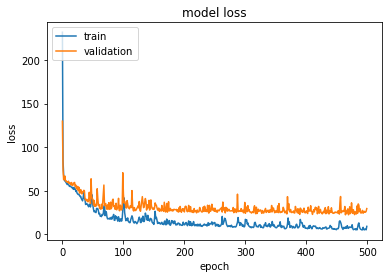

In [8]:
# Let's see how it behaves:
plot_loss_and_error()

If you take a closer look at the graph above, you are seeing a clear example of overfitting. When you compare your train and validation losses, you should have in mind that:

- It's normal for there to be a small difference between them.
- If both metrics are moving in the same direction, everything is fine.
- If the validation metric begins to stagnate while the training metric continues to improve, you are probably close to overfitting.
- If the validation metric is going in the wrong direction, the model is clearly overfitting.

## Overfitting

Overfitting is what happens when your model becomes so good at learning it's training dataset that it becomes bad at analyzing data that it has never seen before. In deep learning, fitting your model to your dataset is not a big deal. The real challenge lies in generalizing your model, making it good at predicting data that is outside of it's test dataset.

The issues with our previous neural network are the following:

- It is a lot more complex than it should be. We need to redesign it.
- We need to lower our epochs
- We are not using any regularization techniques.

Let's start by fixing the easiest problems:

In [9]:
# Let's use a more reasonable architecture this time.
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(32, activation='relu', name='fc1')(inputs)
  model = Dense(32, activation='relu', name='fc2')(model)
    
  outputs = Dense(1, activation='linear', name='fc3')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 32)                448       
_________________________________________________________________
fc2 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None


In [10]:
# Let's also lower our epochs.
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=200,
        batch_size=32)

Train on 404 samples, validate on 102 samples
Epoch 1/200
404/404 [==============================] - 0s 421us/step - loss: 554.5492 - mae: 20.4294 - val_loss: 554.4813 - val_mae: 20.2705
Epoch 2/200
404/404 [==============================] - 0s 54us/step - loss: 475.5861 - mae: 18.5683 - val_loss: 479.1686 - val_mae: 18.6123
Epoch 3/200
404/404 [==============================] - 0s 55us/step - loss: 410.1824 - mae: 16.9653 - val_loss: 418.0211 - val_mae: 17.2737
Epoch 4/200
404/404 [==============================] - 0s 58us/step - loss: 357.5477 - mae: 15.6661 - val_loss: 368.4409 - val_mae: 16.0839
Epoch 5/200
404/404 [==============================] - 0s 54us/step - loss: 314.4378 - mae: 14.5738 - val_loss: 329.5180 - val_mae: 15.0378
Epoch 6/200
404/404 [==============================] - 0s 57us/step - loss: 281.8822 - mae: 13.7335 - val_loss: 297.2295 - val_mae: 14.0754
Epoch 7/200
404/404 [==============================] - 0s 55us/step - loss: 254.4986 - mae: 12.9772 - val_loss: 2

Epoch 60/200
404/404 [==============================] - 0s 52us/step - loss: 75.8569 - mae: 6.0484 - val_loss: 82.6334 - val_mae: 6.7393
Epoch 61/200
404/404 [==============================] - 0s 54us/step - loss: 75.5625 - mae: 6.0273 - val_loss: 82.3808 - val_mae: 6.7381
Epoch 62/200
404/404 [==============================] - 0s 55us/step - loss: 75.2942 - mae: 5.9968 - val_loss: 82.0857 - val_mae: 6.7382
Epoch 63/200
404/404 [==============================] - 0s 50us/step - loss: 75.0558 - mae: 5.9968 - val_loss: 81.7227 - val_mae: 6.7314
Epoch 64/200
404/404 [==============================] - 0s 53us/step - loss: 74.8675 - mae: 6.0009 - val_loss: 81.4379 - val_mae: 6.7308
Epoch 65/200
404/404 [==============================] - 0s 53us/step - loss: 74.6338 - mae: 6.0030 - val_loss: 81.0767 - val_mae: 6.7261
Epoch 66/200
404/404 [==============================] - 0s 51us/step - loss: 74.4153 - mae: 6.0042 - val_loss: 80.7861 - val_mae: 6.7217
Epoch 67/200
404/404 [===================

404/404 [==============================] - 0s 58us/step - loss: 68.5869 - mae: 5.7297 - val_loss: 72.9918 - val_mae: 6.4045
Epoch 120/200
404/404 [==============================] - 0s 55us/step - loss: 68.5615 - mae: 5.7294 - val_loss: 72.8783 - val_mae: 6.4008
Epoch 121/200
404/404 [==============================] - 0s 55us/step - loss: 68.4604 - mae: 5.7234 - val_loss: 72.8384 - val_mae: 6.3968
Epoch 122/200
404/404 [==============================] - 0s 57us/step - loss: 68.3649 - mae: 5.7323 - val_loss: 72.7109 - val_mae: 6.3924
Epoch 123/200
404/404 [==============================] - 0s 54us/step - loss: 68.2807 - mae: 5.7223 - val_loss: 72.6744 - val_mae: 6.3883
Epoch 124/200
404/404 [==============================] - 0s 54us/step - loss: 68.2010 - mae: 5.7241 - val_loss: 72.6060 - val_mae: 6.3850
Epoch 125/200
404/404 [==============================] - 0s 54us/step - loss: 68.1205 - mae: 5.7187 - val_loss: 72.5711 - val_mae: 6.3789
Epoch 126/200
404/404 [=========================

404/404 [==============================] - 0s 55us/step - loss: 64.6518 - mae: 5.5514 - val_loss: 68.3496 - val_mae: 6.1636
Epoch 179/200
404/404 [==============================] - 0s 56us/step - loss: 64.6538 - mae: 5.5870 - val_loss: 68.2262 - val_mae: 6.1571
Epoch 180/200
404/404 [==============================] - 0s 56us/step - loss: 64.5976 - mae: 5.5871 - val_loss: 68.1193 - val_mae: 6.1516
Epoch 181/200
404/404 [==============================] - 0s 55us/step - loss: 64.4436 - mae: 5.5315 - val_loss: 68.0770 - val_mae: 6.1487
Epoch 182/200
404/404 [==============================] - 0s 56us/step - loss: 64.3267 - mae: 5.5499 - val_loss: 67.9941 - val_mae: 6.1423
Epoch 183/200
404/404 [==============================] - 0s 55us/step - loss: 64.2829 - mae: 5.5610 - val_loss: 67.9441 - val_mae: 6.1374
Epoch 184/200
404/404 [==============================] - 0s 67us/step - loss: 64.2627 - mae: 5.5334 - val_loss: 67.9546 - val_mae: 6.1315
Epoch 185/200
404/404 [=========================

102/102 [==============================] - 0s 64us/step
Mean absolute error: 6.083019256591797
Mean squared error: 67.26241137934666


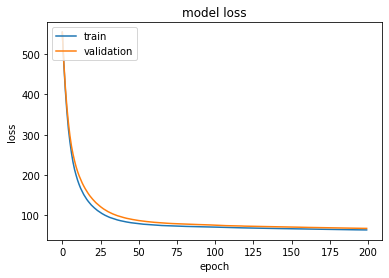

In [11]:
# And let's plot the losses graph once more:
plot_loss_and_error()

Now it looks really better. But there is something you should notice here. Do you see how the losses are not changing much after the epoch 100, give or take? This is a perfect opportunity to apply a technique called **early stopping**.

## Early stopping

Early stopping is basically stopping is basically lowering the amount of epochs you are training your model for. Since the model is not improving much after around epoch 100, maybe we should lower our amount of epochs.

In [12]:
def build_model():
  inputs = Input([13, ], name='data')

  model = Dense(32, activation='relu', name='fc1')(inputs)
  model = Dense(32, activation='relu', name='fc2')(model)
    
  outputs = Dense(1, activation='linear', name='fc3')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

# Let's use half of the epochs we did before.
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=100, 
        batch_size=32)

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 32)                448       
_________________________________________________________________
fc2 (Dense)                  (None, 32)                1056      
_________________________________________________________________
fc3 (Dense)                  (None, 1)                 33        
Total params: 1,537
Trainable params: 1,537
Non-trainable params: 0
_________________________________________________________________
None
Train on 404 samples, validate on 102 samples
Epoch 1/100
404/404 [==============================] - 0s 450us/step - loss: 1435.6911 - mae: 33.1259 - val_loss: 1442.7531 - val_mae: 33.8885
Epoch 2/100
404/404 [==============================] - 0s 59u

Epoch 53/100
404/404 [==============================] - 0s 57us/step - loss: 84.5592 - mae: 6.4991 - val_loss: 96.9374 - val_mae: 7.1162
Epoch 54/100
404/404 [==============================] - 0s 66us/step - loss: 83.3840 - mae: 6.4513 - val_loss: 95.1966 - val_mae: 7.0635
Epoch 55/100
404/404 [==============================] - 0s 64us/step - loss: 82.3008 - mae: 6.3795 - val_loss: 93.7671 - val_mae: 6.9943
Epoch 56/100
404/404 [==============================] - 0s 55us/step - loss: 81.2554 - mae: 6.3320 - val_loss: 92.3290 - val_mae: 6.9545
Epoch 57/100
404/404 [==============================] - 0s 57us/step - loss: 80.3940 - mae: 6.2945 - val_loss: 91.1481 - val_mae: 6.9089
Epoch 58/100
404/404 [==============================] - 0s 55us/step - loss: 79.7488 - mae: 6.2500 - val_loss: 90.0609 - val_mae: 6.8692
Epoch 59/100
404/404 [==============================] - 0s 56us/step - loss: 78.9662 - mae: 6.2253 - val_loss: 89.0142 - val_mae: 6.8406
Epoch 60/100
404/404 [===================

102/102 [==============================] - 0s 72us/step
Mean absolute error: 6.447237491607666
Mean squared error: 76.76943461100261


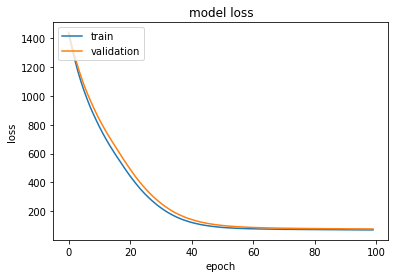

In [13]:
# And analyze the results:
plot_loss_and_error()

In the example above, applying early stopping to our model not only saved some time and computing power, but also lowered our loss.

Now, let's get back to our over complex example, apply regularization to it and see what happens:

## Regularization

The main idea behind regularization is to reduce overfitting. It does that by reducing the complexity of neural network during the training process. Among the popular regularization techniques, we have L1 and L2, which penalize complex models by adding a value to the error function when the weights are high.
By adding a value to the loss function, you force the weights to lower their values. Smaller weights reduce the impact of the hidden neurons, thus making these neurons neglectable and reducing the overall complexity of the neural network.

The most common among these techniques is L2, which is also called *Ridge Regression* or *Weight decay*. L1 is also called *Lasso Regression*, and the difference between them is penalty term, or the value that it adds to the error function. 

- L1 regularization encourage the weight values to be zero. 
- L2 regularization encourages the weights to go towards zero, but not exactly zero.

We also have the dropout technique, which randomly disables a few neurons inside our network. By doing this, the complexity of the network will be reduced, because some neurons, and even sometimes entire layers will be disabled, thus making it a simpler network.

In [14]:
# Let's apply L1 and L2 regularization and spice up the network with some dropouts.
def build_model():
  inputs = Input([13, ], name='data')

  # Notice how the regularization can be applied to each layer, instead to the entire network
  model = Dense(512, activation='relu', name='fc1')(inputs)
  model = Dense(512, activation='relu', name='fc2')(model)
  model = Dropout(0.1)(model)
  model = Dense(512, activation='relu', name='fc3')(model)
  model = Dense(512, activation='relu', name='fc4')(model)
  model = Dropout(0.1)(model)
  model = Dense(512, activation='relu', name='fc5')(model)
  model = Dropout(0.1)(model)  
  model = Dense(512, activation='relu', name='fc6',kernel_regularizer=keras.regularizers.l1_l2(l1=0.5, l2=0.01))(model)
  model = Dense(512, activation='relu', name='fc7',kernel_regularizer=keras.regularizers.l1_l2(l1=0.05, l2=0.01))(model)
    
  outputs = Dense(1, activation='linear', name='fc8')(model)

  model = Model(inputs=[inputs], outputs=outputs)
  model.compile(optimizer=Adam(lr=4e-5), #Gradient Descend Algorithm.
                loss='mse',       #MSE = Mean Squared Error
                metrics=['mae'])
  return model

net = build_model()
print(net.summary())

# same epochs as the complex example.
history = net.fit(x_train,
        y_train,
        validation_data=(x_test, y_test),
        epochs=500, 
        batch_size=32)

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
data (InputLayer)            (None, 13)                0         
_________________________________________________________________
fc1 (Dense)                  (None, 512)               7168      
_________________________________________________________________
fc2 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
fc3 (Dense)                  (None, 512)               262656    
_________________________________________________________________
fc4 (Dense)                  (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0   

404/404 [==============================] - 0s 1ms/step - loss: 3392.6310 - mae: 5.0686 - val_loss: 3368.5060 - val_mae: 5.3798
Epoch 46/500
404/404 [==============================] - 0s 1ms/step - loss: 3351.2456 - mae: 5.3039 - val_loss: 3329.0314 - val_mae: 5.4846
Epoch 47/500
404/404 [==============================] - 0s 1ms/step - loss: 3307.5782 - mae: 5.3947 - val_loss: 3292.2520 - val_mae: 5.7415
Epoch 48/500
404/404 [==============================] - 0s 1ms/step - loss: 3264.4679 - mae: 5.1811 - val_loss: 3252.3432 - val_mae: 5.8550
Epoch 49/500
404/404 [==============================] - 0s 1ms/step - loss: 3221.0008 - mae: 5.0980 - val_loss: 3209.5191 - val_mae: 5.8453
Epoch 50/500
404/404 [==============================] - 0s 1ms/step - loss: 3176.7318 - mae: 5.0007 - val_loss: 3161.2224 - val_mae: 5.5600
Epoch 51/500
404/404 [==============================] - 0s 1ms/step - loss: 3135.6183 - mae: 5.1194 - val_loss: 3123.2601 - val_mae: 5.7295
Epoch 52/500
404/404 [===========

404/404 [==============================] - 0s 1ms/step - loss: 1393.0995 - mae: 3.8540 - val_loss: 1383.9267 - val_mae: 4.0908
Epoch 104/500
404/404 [==============================] - 0s 1ms/step - loss: 1372.2898 - mae: 4.2384 - val_loss: 1369.0332 - val_mae: 4.6720
Epoch 105/500
404/404 [==============================] - 0s 1ms/step - loss: 1344.9538 - mae: 3.9872 - val_loss: 1356.6362 - val_mae: 5.4767
Epoch 106/500
404/404 [==============================] - 0s 1ms/step - loss: 1324.8420 - mae: 4.1436 - val_loss: 1319.4042 - val_mae: 4.4753
Epoch 107/500
404/404 [==============================] - 0s 1ms/step - loss: 1301.6235 - mae: 4.1229 - val_loss: 1321.4150 - val_mae: 6.2427
Epoch 108/500
404/404 [==============================] - 0s 1ms/step - loss: 1280.5977 - mae: 4.2611 - val_loss: 1295.5890 - val_mae: 6.0226
Epoch 109/500
404/404 [==============================] - 0s 1ms/step - loss: 1253.4252 - mae: 3.9449 - val_loss: 1259.7633 - val_mae: 5.0328
Epoch 110/500
404/404 [====

Epoch 162/500
404/404 [==============================] - 0s 1ms/step - loss: 552.9660 - mae: 3.2423 - val_loss: 567.8915 - val_mae: 4.3825
Epoch 163/500
404/404 [==============================] - 0s 1ms/step - loss: 547.0142 - mae: 3.3402 - val_loss: 571.2060 - val_mae: 5.1456
Epoch 164/500
404/404 [==============================] - 0s 1ms/step - loss: 539.5656 - mae: 3.1982 - val_loss: 577.2139 - val_mae: 5.9591
Epoch 165/500
404/404 [==============================] - 0s 1ms/step - loss: 537.0567 - mae: 3.4731 - val_loss: 556.1608 - val_mae: 4.8609
Epoch 166/500
404/404 [==============================] - 0s 1ms/step - loss: 528.6592 - mae: 3.1853 - val_loss: 549.7874 - val_mae: 4.8501
Epoch 167/500
404/404 [==============================] - 0s 1ms/step - loss: 527.0685 - mae: 3.4827 - val_loss: 532.1782 - val_mae: 3.8240
Epoch 168/500
404/404 [==============================] - 0s 1ms/step - loss: 518.7706 - mae: 3.3248 - val_loss: 534.1997 - val_mae: 4.5145
Epoch 169/500
404/404 [====

Epoch 221/500
404/404 [==============================] - 0s 1ms/step - loss: 313.8501 - mae: 3.3300 - val_loss: 323.8586 - val_mae: 3.8240
Epoch 222/500
404/404 [==============================] - 0s 1ms/step - loss: 309.0567 - mae: 3.0058 - val_loss: 324.2776 - val_mae: 4.1757
Epoch 223/500
404/404 [==============================] - 0s 1ms/step - loss: 303.9364 - mae: 2.9439 - val_loss: 317.3647 - val_mae: 3.7790
Epoch 224/500
404/404 [==============================] - 0s 1ms/step - loss: 303.1227 - mae: 3.1848 - val_loss: 315.6067 - val_mae: 3.7734
Epoch 225/500
404/404 [==============================] - 0s 1ms/step - loss: 301.8364 - mae: 3.1917 - val_loss: 315.8395 - val_mae: 3.9733
Epoch 226/500
404/404 [==============================] - 0s 1ms/step - loss: 296.5237 - mae: 2.9891 - val_loss: 318.0272 - val_mae: 4.5275
Epoch 227/500
404/404 [==============================] - 0s 1ms/step - loss: 296.3872 - mae: 3.0702 - val_loss: 308.3611 - val_mae: 3.8311
Epoch 228/500
404/404 [====

Epoch 280/500
404/404 [==============================] - 0s 1ms/step - loss: 196.1181 - mae: 2.9299 - val_loss: 212.6159 - val_mae: 4.0145
Epoch 281/500
404/404 [==============================] - 0s 1ms/step - loss: 194.5569 - mae: 2.9202 - val_loss: 223.7415 - val_mae: 5.0904
Epoch 282/500
404/404 [==============================] - 0s 1ms/step - loss: 195.6619 - mae: 3.0528 - val_loss: 210.6179 - val_mae: 4.0620
Epoch 283/500
404/404 [==============================] - 0s 1ms/step - loss: 194.2314 - mae: 3.0335 - val_loss: 206.5392 - val_mae: 3.8297
Epoch 284/500
404/404 [==============================] - 0s 1ms/step - loss: 190.7886 - mae: 2.8720 - val_loss: 206.4452 - val_mae: 3.9266
Epoch 285/500
404/404 [==============================] - 0s 1ms/step - loss: 187.5199 - mae: 2.7613 - val_loss: 206.6650 - val_mae: 4.0624
Epoch 286/500
404/404 [==============================] - 0s 1ms/step - loss: 188.8824 - mae: 2.9735 - val_loss: 204.7631 - val_mae: 3.9563
Epoch 287/500
404/404 [====

Epoch 339/500
404/404 [==============================] - 0s 1ms/step - loss: 134.4605 - mae: 2.9136 - val_loss: 152.0931 - val_mae: 4.1342
Epoch 340/500
404/404 [==============================] - 0s 1ms/step - loss: 130.9656 - mae: 2.7433 - val_loss: 147.7641 - val_mae: 3.8544
Epoch 341/500
404/404 [==============================] - 0s 1ms/step - loss: 130.5955 - mae: 2.7814 - val_loss: 156.1245 - val_mae: 4.6575
Epoch 342/500
404/404 [==============================] - 0s 1ms/step - loss: 130.3882 - mae: 2.8026 - val_loss: 146.5023 - val_mae: 3.8724
Epoch 343/500
404/404 [==============================] - 0s 1ms/step - loss: 129.6600 - mae: 2.7920 - val_loss: 144.9825 - val_mae: 3.8093
Epoch 344/500
404/404 [==============================] - 0s 1ms/step - loss: 128.1550 - mae: 2.7458 - val_loss: 144.0179 - val_mae: 3.7540
Epoch 345/500
404/404 [==============================] - 0s 1ms/step - loss: 127.9820 - mae: 2.7596 - val_loss: 146.5770 - val_mae: 4.0429
Epoch 346/500
404/404 [====

404/404 [==============================] - 0s 1ms/step - loss: 95.7540 - mae: 2.8318 - val_loss: 108.5272 - val_mae: 3.6030
Epoch 399/500
404/404 [==============================] - 0s 1ms/step - loss: 93.3604 - mae: 2.6224 - val_loss: 114.1134 - val_mae: 4.1432
Epoch 400/500
404/404 [==============================] - 0s 1ms/step - loss: 94.4542 - mae: 2.7571 - val_loss: 116.9298 - val_mae: 4.3388
Epoch 401/500
404/404 [==============================] - 0s 1ms/step - loss: 94.0922 - mae: 2.7145 - val_loss: 112.1922 - val_mae: 4.0261
Epoch 402/500
404/404 [==============================] - 0s 1ms/step - loss: 92.5232 - mae: 2.7402 - val_loss: 114.4568 - val_mae: 4.2806
Epoch 403/500
404/404 [==============================] - 0s 1ms/step - loss: 91.8775 - mae: 2.7188 - val_loss: 112.1742 - val_mae: 4.1396
Epoch 404/500
404/404 [==============================] - 0s 1ms/step - loss: 93.4226 - mae: 2.8267 - val_loss: 108.4545 - val_mae: 3.9435
Epoch 405/500
404/404 [=========================

Epoch 458/500
404/404 [==============================] - 0s 1ms/step - loss: 67.6057 - mae: 2.5692 - val_loss: 85.5069 - val_mae: 3.6947
Epoch 459/500
404/404 [==============================] - 0s 1ms/step - loss: 67.3963 - mae: 2.5824 - val_loss: 84.5003 - val_mae: 3.5864
Epoch 460/500
404/404 [==============================] - 0s 1ms/step - loss: 68.6195 - mae: 2.7047 - val_loss: 89.6965 - val_mae: 4.0802
Epoch 461/500
404/404 [==============================] - 0s 1ms/step - loss: 67.7218 - mae: 2.6404 - val_loss: 84.7755 - val_mae: 3.7993
Epoch 462/500
404/404 [==============================] - 0s 1ms/step - loss: 67.6515 - mae: 2.6306 - val_loss: 84.6708 - val_mae: 3.7157
Epoch 463/500
404/404 [==============================] - 0s 1ms/step - loss: 67.2135 - mae: 2.6422 - val_loss: 82.7166 - val_mae: 3.6001
Epoch 464/500
404/404 [==============================] - 0s 1ms/step - loss: 67.5912 - mae: 2.7685 - val_loss: 82.6639 - val_mae: 3.6506
Epoch 465/500
404/404 [==================

102/102 [==============================] - 0s 202us/step
Mean absolute error: 3.8454177379608154
Mean squared error: 73.75981559005439


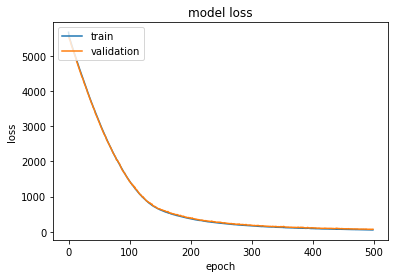

In [15]:
# And analyze the results:
plot_loss_and_error()

When you compare this new graph with the graph from the same network, but with no regularization techniques, you will notice how closer the losses over time are closer to each other. So, even though our losses are slightly higher, our model is generalizing really better. This is the real goal when designing neural networks, finding the balance between the accuracy and ability to generalize with data outside the training dataset.